# An Exploratory Look at the Ocean Wave Data from a Buoy

## Data Description

### Standard Meteorological Data
| Name | Explanation |
|:------:|:-------------|
|WDIR 	|Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD. See Wind Averaging Methods|
|WSPD 	|Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly. See Wind Averaging Methods.|
|GST 	|Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period. The 5 or 8 second period can be determined by payload, See the Sensor Reporting, Sampling, and Accuracy section.|
|WVHT 	|Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period. See the Wave Measurements section.|
|DPD 	|Dominant wave period (seconds) is the period with the maximum wave energy. See the Wave Measurements section.|
|APD 	|Average wave period (seconds) of all waves during the 20-minute period. See the Wave Measurements section.|
|MWD 	|The direction from which the waves at the dominant period (DPD) are coming. The units are degrees from true North, increasing clockwise, with North as 0 (zero) degrees and East as 90 degrees. See the Wave Measurements section.|
|PRES 	|Sea level pressure (hPa). For C-MAN sites and Great Lakes buoys, the recorded pressure is reduced to sea level using the method described in NWS Technical Procedures Bulletin 291 (11/14/80). ( labeled BAR in Historical files)|
|ATMP 	|Air temperature (Celsius). For sensor heights on buoys, see Hull Descriptions. For sensor heights at C-MAN stations, see C-MAN Sensor Locations|
|WTMP 	|Sea surface temperature (Celsius). For buoys the depth is referenced to the hull's waterline. For fixed platforms it varies with tide, but is referenced to, or near Mean Lower Low Water (MLLW).|
|DEWP 	|Dewpoint temperature taken at the same height as the air temperature measurement.|
|VIS 	|Station visibility (nautical miles). Note that buoy stations are limited to reports from 0 to 1.6 nmi.|
|PTDY 	|Pressure Tendency is the direction (plus or minus) and the amount of pressure change (hPa)for a three hour period ending at the time of observation. (not in Historical files)|
|TIDE 	|The water level in feet above or below Mean Lower Low Water (MLLW). |

More information regarding measurement descriptions and units can be found here: https://www.ndbc.noaa.gov/measdes.shtml

### Inromation about the Buoy:
- Station 46042 (LLNR 297) - MONTEREY - 27NM WNW of Monterey, CA.
- Owned and maintained by National Data Buoy Center
- Located at 36.785 N 122.398 W (36°47'5" N 122°23'54" W)

In [3]:
# Letts import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!conda install -c conda-forge folium=0.9 --yes
#!conda install -c conda-forge windrose=1.6.7 --yes
from windrose import WindroseAxes
import folium
# Put figures in the center
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Location of the Buoy

In [4]:
# Latitude and Longitude of the Buoy
lat=36.785
lng=-122.398
BuoyMap = folium.Map(location=[lat, lng], zoom_start=8)
BuoyLoc = folium.map.FeatureGroup()
BuoyLoc.add_child(folium.CircleMarker([lat, lng],radius=5, color='yellow',fill=True,fill_color='blue',fill_opacity=0.6))
BuoyMap.add_child(BuoyLoc)

In [5]:
# reading the data file
df = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=46042h2018.txt.gz&dir=data/historical/stdmet/', delim_whitespace=True, skiprows=range(1,2))
df.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2017,12,31,23,50,175,2.5,3.1,1.15,10.81,5.90,283,1018.8,13.3,14.0,999.0,99.0,99.0
1,2018,1,1,0,50,163,3.4,4.6,0.98,10.00,5.62,289,1019.0,13.4,14.1,999.0,99.0,99.0
2,2018,1,1,1,50,172,3.5,4.1,0.97,10.00,5.55,292,1019.6,13.5,14.2,999.0,99.0,99.0
3,2018,1,1,2,50,180,2.8,3.9,0.93,10.00,5.54,271,1020.0,13.6,14.2,999.0,99.0,99.0
4,2018,1,1,3,50,171,3.0,3.9,0.92,11.43,5.61,269,1020.4,13.7,14.2,999.0,99.0,99.0


In [6]:
# Let's drop the las three columns since this Buoy does not measure those quantities
df.drop(columns=['DEWP','VIS','TIDE'],inplace=True)

In [7]:
#df.describe()

## A general look at the wave height and wave period

In [8]:
# Concatonates (#YY MM DD hh mm) into one column as DATE
df.rename(columns={'#YY':'year','MM':'month','DD':'day','hh':'hour','mm':'minute'},inplace=True)
df['DATE']=pd.to_datetime(df[['year', 'month', 'day','hour','minute']])
df.drop(columns=['year','month','day','hour','minute'],inplace=True)
df.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DATE
0,175,2.5,3.1,1.15,10.81,5.90,283,1018.8,13.3,14.0,2017-12-31 23:50:00
1,163,3.4,4.6,0.98,10.00,5.62,289,1019.0,13.4,14.1,2018-01-01 00:50:00
2,172,3.5,4.1,0.97,10.00,5.55,292,1019.6,13.5,14.2,2018-01-01 01:50:00
3,180,2.8,3.9,0.93,10.00,5.54,271,1020.0,13.6,14.2,2018-01-01 02:50:00
4,171,3.0,3.9,0.92,11.43,5.61,269,1020.4,13.7,14.2,2018-01-01 03:50:00


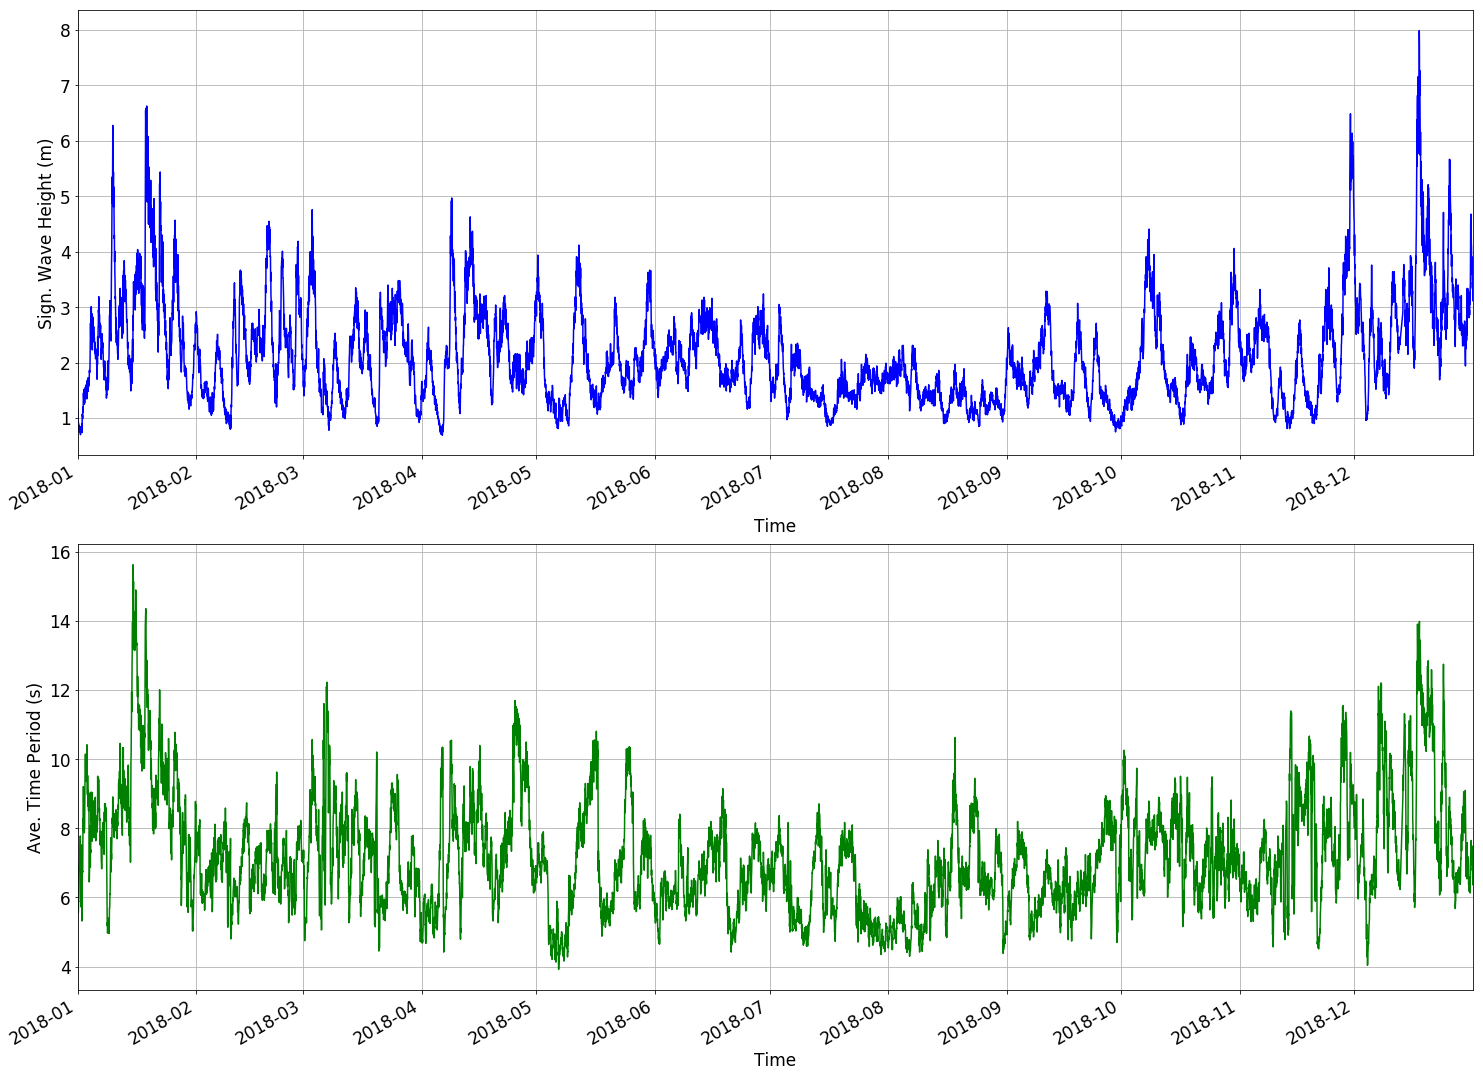

In [9]:
# Plot Sign. Wave Height and Ave. Time Period for the duration of measurements
fig, (axl1, axl2) = plt.subplots(2, 1)
fig.set_size_inches(25, 20)
FNTSize = 17
df.plot(kind='line',x='DATE',y='WVHT',fontsize=FNTSize,ax=axl1,color='blue',legend=False)
axl1.grid()
axl1.set_xlabel('Time',fontsize=FNTSize)
axl1.set_ylabel('Sign. Wave Height (m)',fontsize=FNTSize)

df.plot(kind='line',x='DATE',y='APD',fontsize=FNTSize,ax=axl2,color='green',legend=False)
axl2.set_xlabel('Time',fontsize=FNTSize)
axl2.set_ylabel('Ave. Time Period (s)',fontsize=FNTSize)
axl2.grid()

## Relations between wave height, wave period, and wind speed

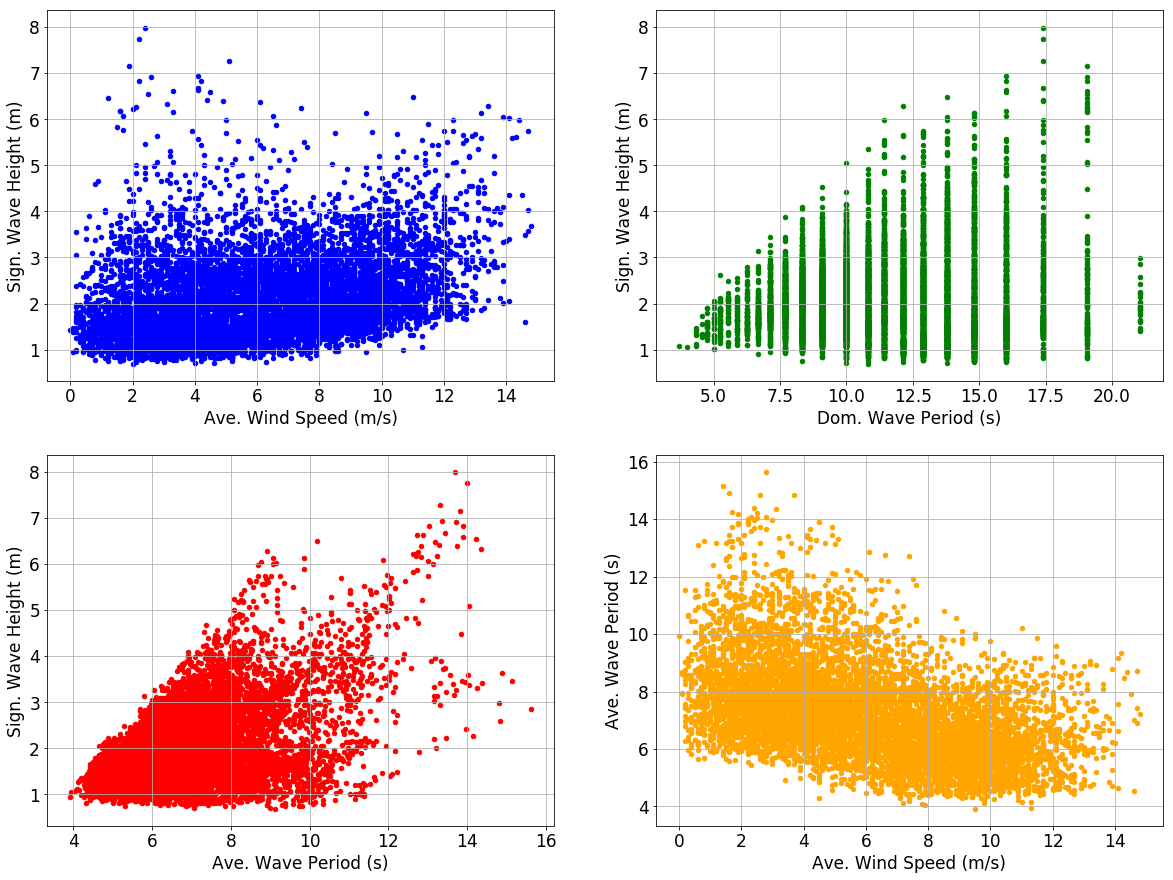

In [10]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
fig.set_size_inches(20, 15)
FNTSize = 17
df.plot(kind='scatter',x='WSPD',y='WVHT',fontsize=FNTSize,ax=ax1,color='blue')
ax1.set_xlabel('Ave. Wind Speed (m/s)',fontsize=FNTSize)
ax1.set_ylabel('Sign. Wave Height (m)',fontsize=FNTSize)
ax1.grid()
#ax1.set_title('')
df.plot(kind='scatter',x='DPD',y='WVHT',fontsize=FNTSize,ax=ax2,color='green')
ax2.set_xlabel('Dom. Wave Period (s)',fontsize=FNTSize)
ax2.set_ylabel('Sign. Wave Height (m)',fontsize=FNTSize)
ax2.grid()
#
df.plot(kind='scatter',x='APD',y='WVHT',fontsize=FNTSize,ax=ax3,color='red')
ax3.set_xlabel('Ave. Wave Period (s)',fontsize=FNTSize)
ax3.set_ylabel('Sign. Wave Height (m)',fontsize=FNTSize)
ax3.grid()
#
df.plot(kind='scatter',x='WSPD',y='APD',fontsize=FNTSize,ax=ax4,color='orange')
ax4.set_xlabel('Ave. Wind Speed (m/s)',fontsize=FNTSize)
ax4.set_ylabel('Ave. Wave Period (s)',fontsize=FNTSize)
ax4.grid()

fig.show()

## Rose plots for wind and wave

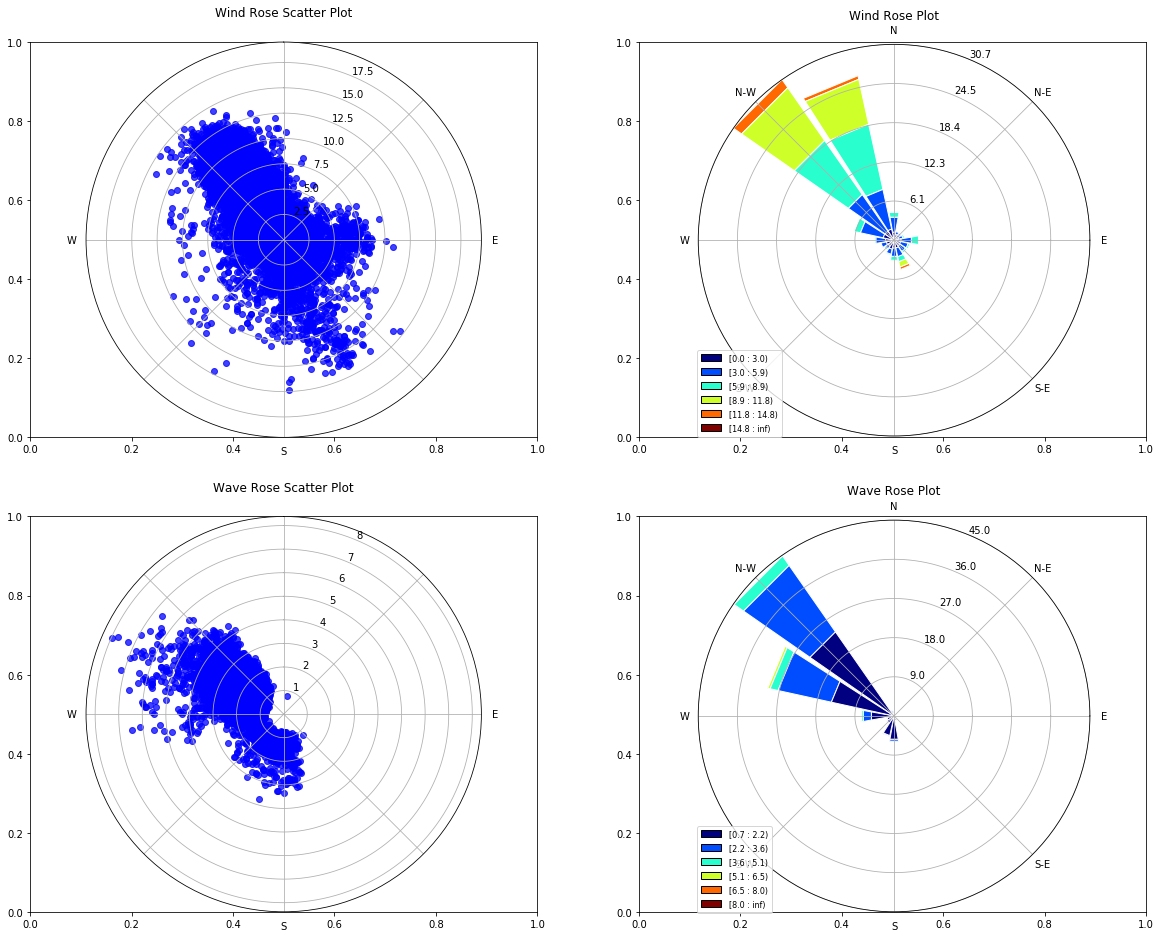

In [12]:
fig, ([ax21, ax22], [ax23, ax24]) = plt.subplots(2, 2)
fig.set_size_inches(20, 16)
FNTSize = 12

# For Wind
theta = df['WDIR'] * np.pi/180.0
r = df['WSPD']
ax21 = fig.add_subplot(221, projection='polar')
ax21.scatter(theta, r, color='blue', cmap='hsv', alpha=0.75)
ax21.set_theta_direction('clockwise')
ax21.set_theta_zero_location('N')
ax21.set_xticklabels(['', '', 'E', '', 'S', '', 'W', ''])
ax21.set_title('Wind Rose Scatter Plot')
plt.subplot(222)
rect=[0.5,0.538,0.45,0.34] 
wa=WindroseAxes(fig,rect)
fig.add_axes(wa)
wa.bar(df['WDIR'], r, normed=True, opening=0.9, edgecolor='white')
wa.set_title('Wind Rose Plot')
wa.set_legend()
# For Wave
theta = df['MWD'] * np.pi/180.0
r = df['WVHT']
ax22 = fig.add_subplot(223, projection='polar')
ax22.scatter(theta, r, color='blue', cmap='hsv', alpha=0.75)
ax22.set_theta_direction('clockwise')
ax22.set_theta_zero_location('N')
ax22.set_xticklabels(['', '', 'E', '', 'S', '', 'W', ''])
ax22.set_title('Wave Rose Scatter Plot')
plt.subplot(224)
rect=[0.5,0.125,0.45,0.34] 
wa2=WindroseAxes(fig,rect)
fig.add_axes(wa2)
wa2.bar(df['MWD'], r, normed=True, opening=0.9, edgecolor='white')
wa2.set_title('Wave Rose Plot')
wa2.set_legend()

fig.show()

## Distribution of wave height and wave frequency

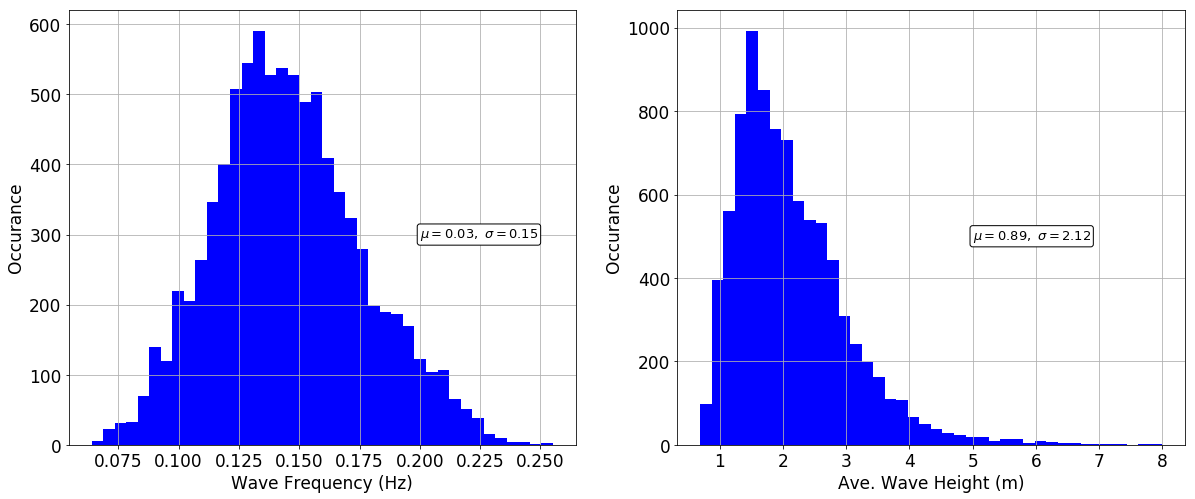

In [83]:
fig, (axf1, axf2) = plt.subplots(1, 2)
fig.set_size_inches(20, 8)
FNTSize = 17
# Frequency of frequencies and wave height
df_frq = 1./df[['APD']]
df_frq.columns=['FRQ']
count, bin_edges = np.histogram(df_frq['FRQ'])

mu, sigma = df_frq.std(), df_frq.mean()
mu.FRQ = round(mu.FRQ,2)
sigma.FRQ = round(sigma.FRQ,2)
df_frq.plot(kind='hist',bins=40,ax=axf1,fontsize=FNTSize,legend=False,colormap='winter')
axf1.set_xlabel('Wave Frequency (Hz)',fontsize=FNTSize)
axf1.set_ylabel('Occurance',fontsize=FNTSize)
axf1.text(0.2, 300, r'$\mu={},\ \sigma={}$'.format(mu.FRQ,sigma.FRQ),{'color': 'black', 'fontsize': 13, 'ha': 'left', 'va': 'center', 'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
axf1.grid()

mu, sigma = df[['WVHT']].std(), df[['WVHT']].mean()
mu.FRQ = round(mu.WVHT,2)
sigma.FRQ = round(sigma.WVHT,2)
df[['WVHT']].plot(kind='hist',bins=40,ax=axf2,fontsize=FNTSize,legend=False,colormap='winter')
axf2.set_xlabel('Ave. Wave Height (m)',fontsize=FNTSize)
axf2.set_ylabel('Occurance',fontsize=FNTSize)
axf2.text(5, 500, r'$\mu={},\ \sigma={}$'.format(mu.FRQ,sigma.FRQ),{'color': 'black', 'fontsize': 13, 'ha': 'left', 'va': 'center', 'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
axf2.grid()

plt.show()